# Importing necessary libraries

In [21]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

# Reading the dataset

In [22]:
df = pd.read_csv("third attempt.csv")

In [23]:
df['New customer index'].value_counts(dropna = False)

0    9995
1       4
Name: New customer index, dtype: int64

In [24]:
numeric_cols = ['Income']
cat_cols = list(set(df.columns) - set(numeric_cols) - {'New customer index'})
cat_cols.sort()

print(numeric_cols)
print(cat_cols)

['Income']
['Activity index', 'Age', 'Customer relation', 'Customer seniority', 'Customer type', 'ID', 'Primary customer', 'Sex']


In [25]:
testing_dataset_train = pd.get_dummies(df, columns = ['Primary customer', 'Age', 'Activity index'], drop_first = True)

In [26]:
random_seed = 4000
df_train, df_test = train_test_split(df, test_size = 0.27, random_state = random_seed, stratify = df['New customer index']) 

In [27]:
print(df_train.shape)
print()
print(df_train['New customer index'].value_counts(normalize = True))

(7299, 10)

0    0.999589
1    0.000411
Name: New customer index, dtype: float64


In [28]:
print(df_test.shape)
print()
print(df_train['New customer index'].value_counts(normalize = True))

(2700, 10)

0    0.999589
1    0.000411
Name: New customer index, dtype: float64


In [29]:
scaler = StandardScaler()
scaler.fit(df_train[numeric_cols])

def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df['New customer index']
    return X, y 

X, y = get_features_and_target_arrays(df_train, numeric_cols, cat_cols, scaler)

In [30]:
clf = LogisticRegression(penalty = 'none')
clf.fit(X, y)

LogisticRegression(penalty='none')

In [31]:
X_test, y_test = get_features_and_target_arrays(df_test, numeric_cols, cat_cols, scaler)

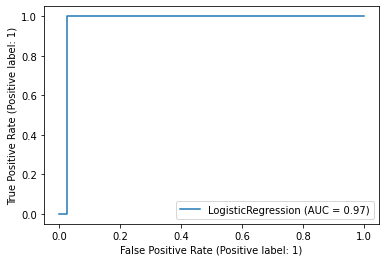

In [32]:
plot_roc_curve(clf, X_test, y_test)

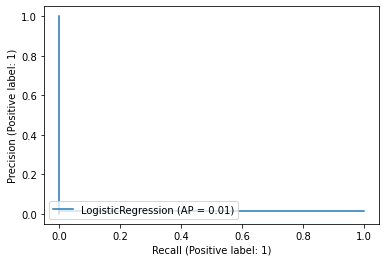

In [33]:
plot_precision_recall_curve(clf, X_test, y_test)

In [34]:
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

In [35]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold: ')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 Score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report ')
print(classification_report(y_test, test_pred))

Log loss = 0.00328
AUC = 0.97332
Average Precision = 0.01370

Using 0.5 as threshold: 
Accuracy = 0.99963
Precision = 0.00000
Recall = 0.00000
F1 Score = 0.00000

Classification Report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2699
           1       0.00      0.00      0.00         1

    accuracy                           1.00      2700
   macro avg       0.50      0.50      0.50      2700
weighted avg       1.00      1.00      1.00      2700



C:\Users\adana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

Confusion Matrix


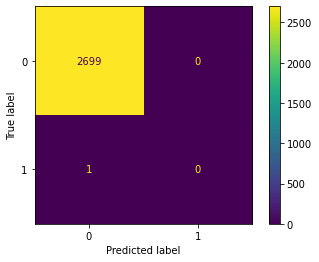

In [36]:
print('Confusion Matrix')
plot_confusion_matrix(clf, X_test, y_test)

In [37]:
coefficients = np.hstack((clf.intercept_, clf.coef_[0]))
pd.DataFrame(data = {'variable': ['intercept'] + cat_cols + numeric_cols, 'coefficient': coefficients})

,variable,coefficient
0,intercept,-4.496543e-12
1,Activity index,1.085930e-10
2,Age,5.223718e-10
3,Customer relation,1.352818e-10
4,Customer seniority,-1.479672e-08
5,Customer type,-2.259993e-12
6,ID,-7.435829e-06
7,Primary customer,-5.719343e-11
8,Sex,8.831511e-11
9,Income,9.100667e-11


In [38]:
pd.DataFrame(data = {'variable': numeric_cols, 'unit': np.sqrt(scaler.var_)})

,variable,unit
0,Income,90578.584924
